In [91]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
# Read time series data from file
participant = "Shiven"
song_id = "A"

file_paths = []
while song_id <= "C":
    file_paths.append(f"timestamp_files/timestamps_{participant}_{song_id}.txt") 
    song_id = chr(ord(song_id) + 1)
   
time_series_data = []

for file_path in file_paths:
    with open(file_path, "r") as file:
        time_series_datum = file.read()
        time_series_data.append(time_series_datum)

# Parse the time series data
time_points_all = []
for time_series_datum in time_series_data:
    time_points = []
    for line in time_series_datum.split('\n'):
        if line.strip():
            time_points.append(float(line.split()[0]))
    time_points_all.append(time_points)

print(time_points_all)

[[0.635, 1.085, 1.549, 1.999, 2.5, 3.02, 3.492, 4.028, 4.528, 5.006, 5.471, 5.971, 6.5, 6.993, 7.493, 8.05, 8.464, 8.949, 9.432, 9.892, 10.385, 10.878, 11.363, 11.877, 12.406, 12.877, 13.384, 13.827, 14.305, 14.834, 15.341, 15.826, 16.319, 16.805, 17.297, 17.762, 18.254, 18.769, 19.283, 19.776, 20.268, 20.732, 21.211, 21.711, 22.196, 22.739, 23.239, 23.703, 24.139, 24.639, 25.174, 25.653, 26.188, 26.645, 27.195, 27.631, 28.124, 28.638, 29.116, 29.595, 30.073, 30.559, 31.088, 31.587, 32.059, 32.508, 33.044, 33.53, 33.987, 34.508, 35.029, 35.494, 35.943, 36.45, 36.965, 37.493, 37.971, 38.478, 38.971, 39.45, 39.978, 40.443, 40.928, 41.414, 41.907, 42.4, 42.916, 43.392, 43.863, 44.37, 44.849, 45.35, 45.852, 46.349, 46.814, 47.335, 47.85, 48.407, 48.936, 49.479, 49.979, 50.493, 51.015, 51.522, 52.044, 52.594, 53.136, 53.687, 54.259, 54.73, 55.281, 55.824, 56.338, 56.874, 57.403, 57.917, 58.446, 58.948, 59.499, 60.039, 60.532, 61.097, 61.611, 62.162, 62.647, 63.198, 63.691, 64.212, 64.698, 6

In [93]:
# Calculate time difference for 122 bpm
bpm = [122, 51, 109]
seconds_per_beat = [60 / bpm[0], 60 / bpm[1], 60 / bpm[2]]
num_beats = [len(i) for i in time_points_all]
baseline_time_points = [[seconds_per_beat[i]] * (num_beats[i]) for i in range(3)]

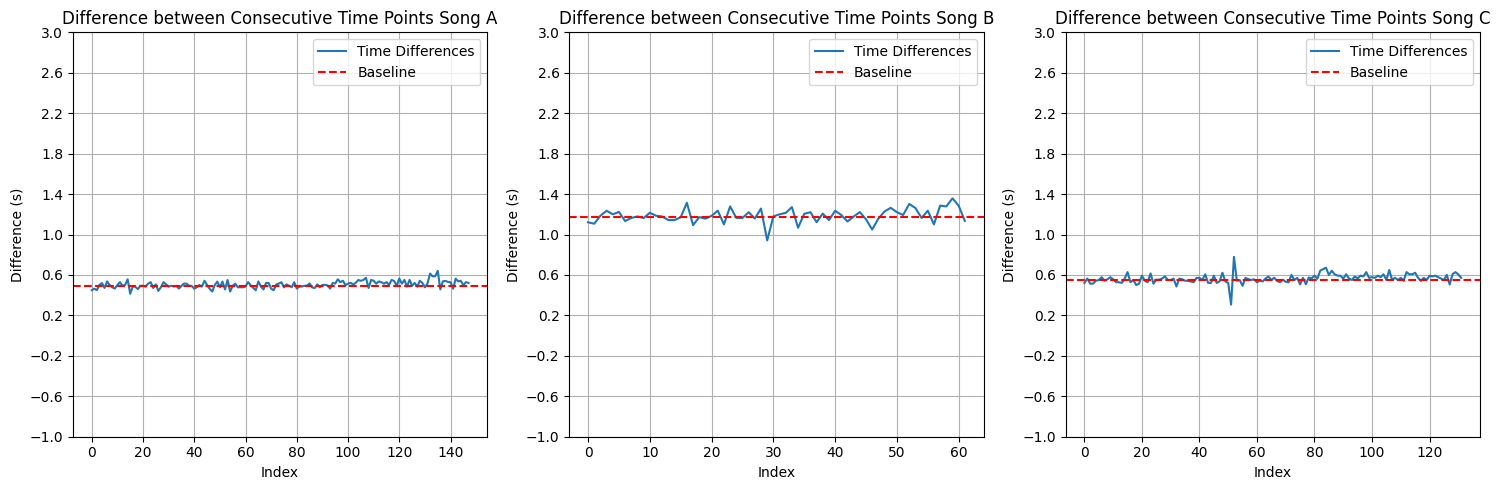

In [94]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the differences and the baseline
for i in range(3):
  # Calculate differences between consecutive time points
  differences = np.diff(time_points_all[i])
  axs[i].plot(np.arange(len(differences)), differences, label='Time Differences')
  axs[i].axhline(y=baseline_time_points[i][0], color='r', linestyle='--', label='Baseline')
  
  axs[i].ylim = [-1, 3]
  axs[i].set_yticks(np.linspace(-1, 3, 10 + 1))  # Set ticks at intervals of 1
    

  axs[i].set_xlabel('Index')
  axs[i].set_ylabel('Difference (s)')
  axs[i].set_title(f'Difference between Consecutive Time Points Song {chr(ord("A") + i)}')
  axs[i].legend()
  axs[i].grid(True)
  
plt.tight_layout()
plt.show()